# CREDIT CARD SPEND PREDICTION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# reading data into pandas
path="spend_prediction/spend_data.xlsx"
spend=pd.read_excel(path)


In [4]:
spend.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [5]:
spend.describe().T

,count,mean,std,min,25%,50%,75%,max
region,5000.0,3.001400,1.421760,1.000000,2.000000,3.000000,4.000000,5.000000
townsize,4998.0,2.687275,1.425925,1.000000,1.000000,3.000000,4.000000,5.000000
gender,5000.0,0.503600,0.500037,0.000000,0.000000,1.000000,1.000000,1.000000
age,5000.0,47.025600,17.770338,18.000000,31.000000,47.000000,62.000000,79.000000
agecat,5000.0,4.238800,1.308785,2.000000,3.000000,4.000000,5.000000,6.000000
ed,5000.0,14.543000,3.281083,6.000000,12.000000,14.000000,17.000000,23.000000
edcat,5000.0,2.672000,1.211738,1.000000,2.000000,2.000000,4.000000,5.000000
jobcat,5000.0,2.752800,1.737900,1.000000,1.000000,2.000000,4.000000,6.000000
union,5000.0,0.151200,0.358280,0.000000,0.000000,0.000000,0.000000,1.000000
employ,5000.0,9.730400,9.690929,0.000000,2.000000,7.000000,15.000000,52.000000


In [6]:
# checking for NUll values in data
null_col=spend.columns[spend.isnull().any()].tolist()
null_col

[u'townsize',
 u'lncreddebt',
 u'lnothdebt',
 u'commutetime',
 u'longten',
 u'lnlongten',
 u'lntollmon',
 u'lntollten',
 u'lnequipmon',
 u'lnequipten',
 u'lncardmon',
 u'cardten',
 u'lncardten',
 u'lnwiremon',
 u'lnwireten']

In [7]:
#Total card spent= primary card spend+ secondary card spend . This will be our target variable

spend['total_spend']=spend['cardspent']+spend['card2spent']


In [8]:
#spend_t=pd.DataFrame(spend_target,columns=['cr_spend'])

In [9]:
spend_data=spend.drop(['cardspent','card2spent'],axis=1)

In [10]:
spend_data.describe().T

,count,mean,std,min,25%,50%,75%,max
region,5000.0,3.001400,1.421760,1.000000,2.000000,3.000000,4.000000,5.000000
townsize,4998.0,2.687275,1.425925,1.000000,1.000000,3.000000,4.000000,5.000000
gender,5000.0,0.503600,0.500037,0.000000,0.000000,1.000000,1.000000,1.000000
age,5000.0,47.025600,17.770338,18.000000,31.000000,47.000000,62.000000,79.000000
agecat,5000.0,4.238800,1.308785,2.000000,3.000000,4.000000,5.000000,6.000000
ed,5000.0,14.543000,3.281083,6.000000,12.000000,14.000000,17.000000,23.000000
edcat,5000.0,2.672000,1.211738,1.000000,2.000000,2.000000,4.000000,5.000000
jobcat,5000.0,2.752800,1.737900,1.000000,1.000000,2.000000,4.000000,6.000000
union,5000.0,0.151200,0.358280,0.000000,0.000000,0.000000,0.000000,1.000000
employ,5000.0,9.730400,9.690929,0.000000,2.000000,7.000000,15.000000,52.000000


In [11]:
spend_data[null_col].describe().T

,count,mean,std,min,25%,50%,75%,max
townsize,4998.0,2.687275,1.425925,1.000000,1.000000,3.000000,4.000000,5.000000
lncreddebt,4999.0,-0.130454,1.273058,-6.597334,-0.952685,-0.076106,0.724665,4.692014
lnothdebt,4999.0,0.696915,1.128578,-4.092107,-0.018987,0.741537,1.462053,4.952011
commutetime,4998.0,25.345538,5.879149,8.000000,21.000000,25.000000,29.000000,48.000000
longten,4997.0,708.871753,979.291072,0.900000,104.600000,350.000000,913.850000,13046.500000
lnlongten,4997.0,5.611298,1.649308,-0.105361,4.650144,5.857933,6.817666,9.476275
lntollmon,2378.0,3.243230,0.404659,2.079442,2.970414,3.228826,3.518980,4.622519
lntollten,2378.0,6.584783,1.222040,2.169054,5.912218,6.858013,7.459900,8.842669
lnequipmon,1704.0,3.600238,0.283385,2.833213,3.412797,3.598681,3.790138,4.666265
lnequipten,1704.0,6.747296,1.199234,2.489065,6.171570,7.050556,7.649835,8.783442


In [12]:
# removing colums having more null values :
l=['lntollmon','lntollten','lnequipmon','lnequipten','lncardmon','lncardten','lnwiremon','lnwireten','custid']
spend_data=spend_data.drop(l,axis=1)
spend_data.shape

(5000, 122)

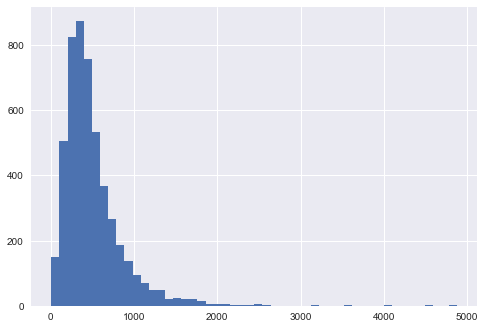

In [13]:

#spend_target.hist(bins=50)
spend_data['total_spend'].hist(bins=50)

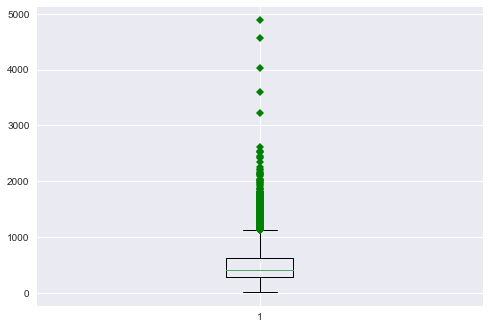

In [14]:
# it shows that there are outliers in the data . we can't remover outliers as such because it might have some useful information
# about credit card spend. So we do log tranformations to remove effect of outliers.
plt.boxplot(spend_data['total_spend'].values,sym='gD');


## It shows that we have outliers in response variable. So we need to do some data tranformation on it before building into Model.

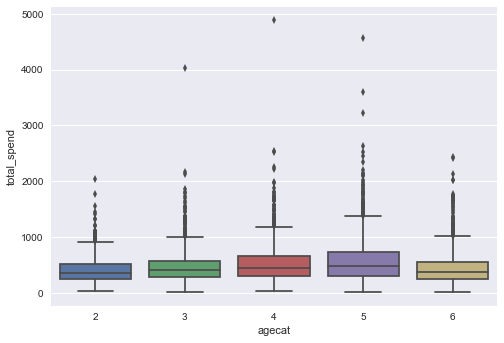

In [15]:
sns.boxplot(x='agecat',y='total_spend',data=spend_data)

## Boxplot of agecat: total spend shows difference in median among agecat .

---

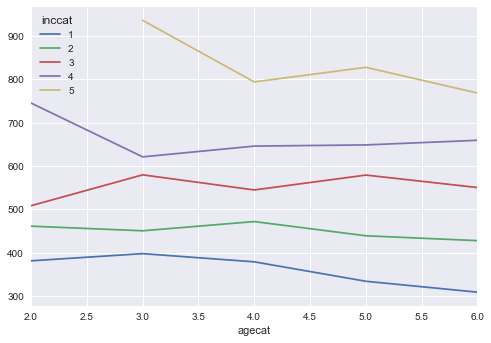

In [16]:
# cumulative efect of agecat & inccat
pd.pivot_table(spend_data,values='total_spend',index=['agecat','inccat']).unstack().plot();

## Above graph shows effect of agecat & jobcat on total spend:
- for incat 5 total spend decrease with age.
- Total spend increases with incresed income
- Total spend is decreasing for incat 1& 2 with incresed age


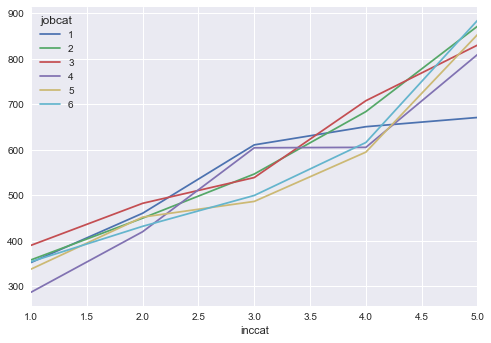

In [122]:
pd.pivot_table(spend_data,values='total_spend',index=['inccat','jobcat']).unstack().plot();

##  Total spend increases with incresead income & job level
- Job level 6, 2 has highest increse in spend .

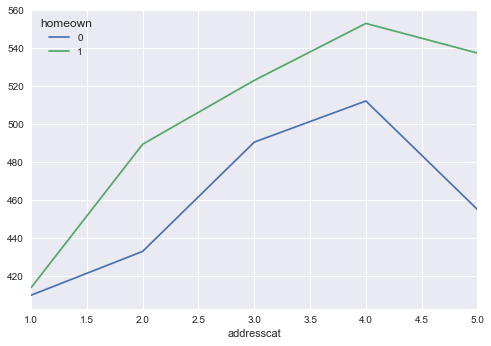

In [18]:
pd.pivot_table(spend_data,values='total_spend',index=['addresscat','homeown']).unstack().plot();

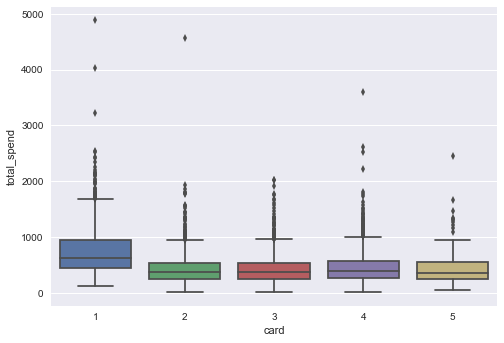

In [20]:
sns.boxplot(x='card',y='total_spend',data=spend_data)

# card of type 1 (american express) has effect on credit card spend

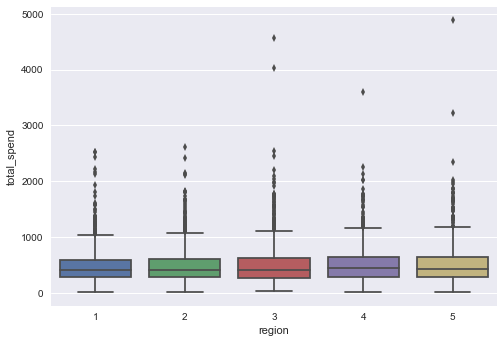

In [21]:
sns.boxplot(x='region',y='total_spend',data=spend_data)

# No effect on median spend w.r.t region category

---

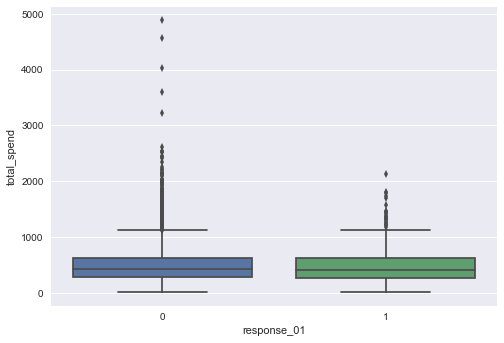

In [22]:
sns.boxplot(x='response_01',y='total_spend',data=spend_data)

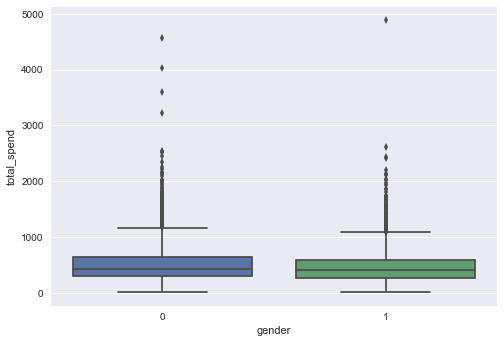

In [23]:
sns.boxplot(x='gender',y='total_spend',data=spend_data)

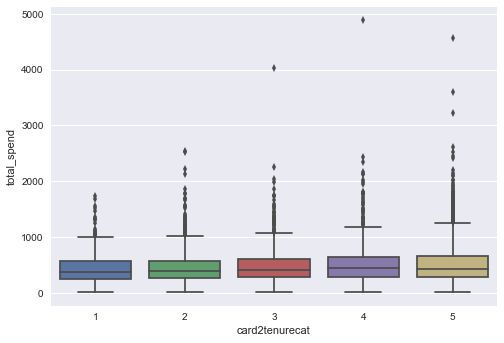

In [24]:
sns.boxplot(x='card2tenurecat',y='total_spend',data=spend_data)

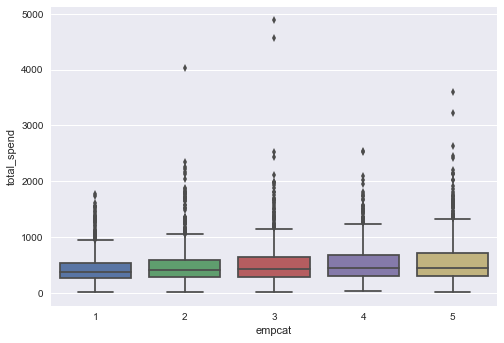

In [25]:
sns.boxplot(x='empcat',y='total_spend',data=spend_data)

# increased tenure effects total_spend

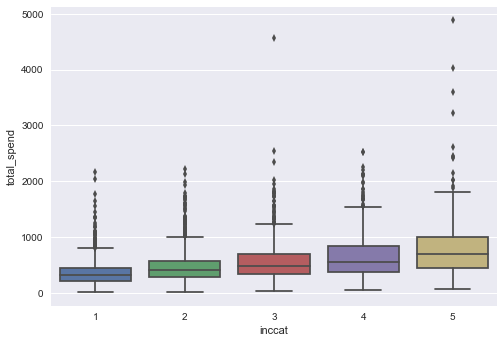

In [26]:
sns.boxplot(x='inccat',y='total_spend',data=spend_data)

# with increased income spend increses


---

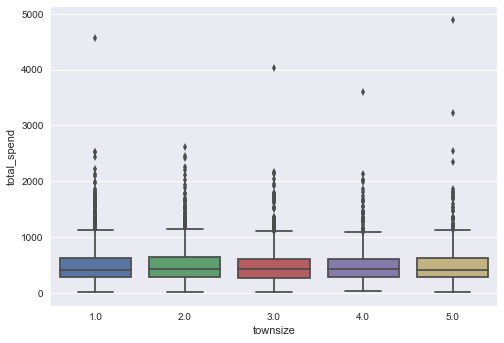

In [27]:
sns.boxplot(x='townsize',y='total_spend',data=spend_data)

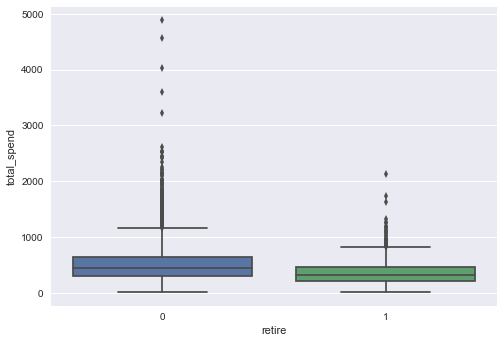

In [29]:
sns.boxplot(x='retire',y='total_spend',data=spend_data)

# Not retired are spending more

---

In [123]:
# Since spend distribution has extreme values, so we performing Log Tranformation
spend_target=np.log(spend['total_spend'])

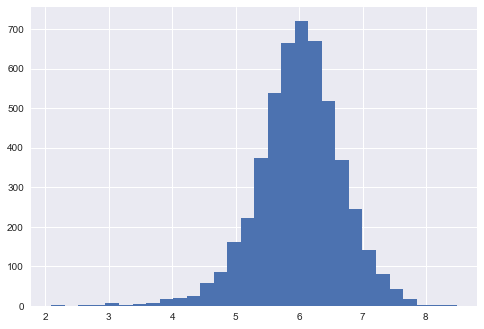

In [33]:
spend_target.hist(bins=30)

In [34]:
spend_target.kurtosis()

1.9092375252136504

In [35]:
spend_data.dtypes

region           int64
townsize       float64
gender           int64
age              int64
agecat           int64
birthmonth      object
ed               int64
edcat            int64
jobcat           int64
union            int64
employ           int64
empcat           int64
retire           int64
income           int64
lninc          float64
inccat           int64
debtinc        float64
creddebt       float64
lncreddebt     float64
othdebt        float64
lnothdebt      float64
default          int64
jobsat           int64
marital          int64
spoused          int64
spousedcat       int64
reside           int64
pets             int64
pets_cats        int64
pets_dogs        int64
                ...   
callcard         int64
cardmon        float64
cardten        float64
wireless         int64
wiremon        float64
wireten        float64
multline         int64
voice            int64
pager            int64
internet         int64
callid           int64
callwait         int64
forward    

In [36]:
# dropping column which have respective categorical column. Also dropping alreday log trannformed column & some categotrical features
col_list_drop=['birthmonth','employ','address','age','ed','carvalue','cartype','commute','commutetime','commutecar','commutemotorcycle',
              'commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute',
               'cardtenure','card2tenure','bfast','lnothdebt','lnlongmon','lnlongten','lninc','income','lncreddebt','spoused',
               'longten','cardten','townsize','gender','union','default','jobsat',
                  'marital','spousedcat','hometype','cars','carcatvalue','carown','commutecat','reason',
                  'polview','polcontrib','polparty','vote','cardtype','cardbenefit','cardfee','cardtenurecat',
                  'card2type','card2benefit','card2fee','card2tenurecat','carditems','card2items','active',
                 'churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid','callwait',
                  'forward','confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news',
                 'response_01','response_02','response_03','carbuy','carbought']

In [37]:
# categorical Features 
feat_categorical=['agecat','edcat','jobcat','retire','card','inccat','card2','region','empcat','addresscat','homeown']                                

In [38]:
len(feat_categorical)

11

In [39]:
# Log transforming  total_spend to negate effect of outliers
spend_target=np.log(spend_data['total_spend'])
spend_ind=spend_data.drop(col_list_drop,axis=1)
spend_ind=spend_ind.drop(['total_spend'],axis=1)

In [40]:
spend_ind.shape

(5000, 33)

In [41]:
# Separating Numerical Features 
feat_numerical=[x for x in spend_ind.columns if x not in feat_categorical]

In [42]:
feat_numerical

[u'debtinc',
 u'creddebt',
 u'othdebt',
 u'reside',
 u'pets',
 u'pets_cats',
 u'pets_dogs',
 u'pets_birds',
 u'pets_reptiles',
 u'pets_small',
 u'pets_saltfish',
 u'pets_freshfish',
 u'tenure',
 u'longmon',
 u'tollmon',
 u'tollten',
 u'equipmon',
 u'equipten',
 u'cardmon',
 u'wiremon',
 u'wireten',
 u'hourstv']

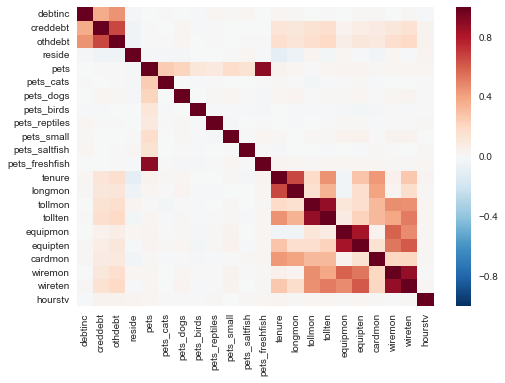

In [43]:
#Checking  Corelation Among Numerical Features
sns.heatmap(spend_ind[feat_numerical].corr())

## Most of the numerical features are not co-related. For corelated features we will implement feature selection technique (feature_importance_) of Extratreeregressor

---

In [44]:
# Preliminary analysis of distribution of numerical featres
spend_ind[feat_numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
debtinc,5000.0,9.954160,6.399783,0.0,5.100000,8.800000,13.60000,43.100000
creddebt,5000.0,1.857326,3.415732,0.0,0.385520,0.926437,2.06382,109.072596
othdebt,5000.0,3.654460,5.395172,0.0,0.980301,2.098540,4.31478,141.459150
reside,5000.0,2.204000,1.393977,1.0,1.000000,2.000000,3.00000,9.000000
pets,5000.0,3.067400,3.414497,0.0,0.000000,2.000000,5.00000,21.000000
pets_cats,5000.0,0.500400,0.860783,0.0,0.000000,0.000000,1.00000,6.000000
pets_dogs,5000.0,0.392400,0.796084,0.0,0.000000,0.000000,0.00000,7.000000
pets_birds,5000.0,0.110400,0.494227,0.0,0.000000,0.000000,0.00000,5.000000
pets_reptiles,5000.0,0.055600,0.325776,0.0,0.000000,0.000000,0.00000,6.000000
pets_small,5000.0,0.114600,0.568798,0.0,0.000000,0.000000,0.00000,7.000000


## Based on above we need to perform some tranformation as there are cased of outliers in columns. We can't delete them so to remove their effect we will perform log tranformations

---

In [45]:
spend_ind[feat_numerical]=spend_ind[feat_numerical].applymap(lambda x: np.log(x+1))

In [46]:
spend_ind[feat_numerical].describe()

,debtinc,creddebt,othdebt,reside,pets,pets_cats,pets_dogs,pets_birds,pets_reptiles,pets_small,...,tenure,longmon,tollmon,tollten,equipmon,equipten,cardmon,wiremon,wireten,hourstv
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2.212898,0.800968,1.230757,1.082986,1.047297,0.287562,0.224790,0.059680,0.032248,0.056449,...,3.392260,2.411163,1.562424,3.133577,1.236503,2.300561,2.127789,0.976759,1.830941,2.968401
std,0.633078,0.611692,0.714314,0.390849,0.859562,0.449044,0.415504,0.247723,0.173910,0.258074,...,0.876978,0.694701,1.662752,3.395694,1.727387,3.274854,1.413300,1.623116,3.091855,0.448697
min,0.000000,0.000000,0.000000,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.641854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.808289,0.326075,0.683249,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.944439,1.902108,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.890372
50%,2.282382,0.655672,1.130931,1.098612,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.663562,2.356126,0.000000,0.000000,0.000000,0.000000,2.691243,0.000000,0.000000,3.044522
75%,2.681022,1.119662,1.670492,1.386294,1.791759,0.693147,0.000000,0.000000,0.000000,0.000000,...,4.094345,2.865054,3.238678,6.787225,3.459466,6.236687,3.167583,3.089336,4.510424,3.178054
max,3.786460,4.701140,4.959055,2.302585,3.091042,1.945910,2.079442,1.791759,1.945910,2.079442,...,4.290459,5.197668,5.159055,8.842814,4.675629,8.783595,5.244389,5.232445,9.461850,3.610918


In [47]:
'card' in spend_ind.columns.tolist()

True

In [48]:
# importing Library


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [49]:
spend_ind.columns

Index([u'region', u'agecat', u'edcat', u'jobcat', u'empcat', u'retire',
       u'inccat', u'debtinc', u'creddebt', u'othdebt', u'reside', u'pets',
       u'pets_cats', u'pets_dogs', u'pets_birds', u'pets_reptiles',
       u'pets_small', u'pets_saltfish', u'pets_freshfish', u'homeown',
       u'addresscat', u'card', u'card2', u'tenure', u'longmon', u'tollmon',
       u'tollten', u'equipmon', u'equipten', u'cardmon', u'wiremon',
       u'wireten', u'hourstv'],
      dtype='object')

In [50]:
# Checking if there is any null column in numerical feature. If its there then we have to do imputation
spend_ind[feat_categorical].columns[spend_ind[feat_categorical].isnull().any()]

Index([], dtype='object')

In [51]:
spend_ind.head()

,region,agecat,edcat,jobcat,empcat,retire,inccat,debtinc,creddebt,othdebt,...,tenure,longmon,tollmon,tollten,equipmon,equipten,cardmon,wiremon,wireten,hourstv
0,1,2,3,1,1,0,2,2.493205,0.788870,1.175601,...,1.791759,2.014903,3.401197,5.087905,3.417727,4.844974,2.724580,0.000000,0.000000,2.639057
1,5,2,4,2,1,0,1,2.975530,0.798417,0.943120,...,3.688879,2.292535,0.000000,0.000000,4.022670,7.588830,2.833213,3.842673,7.429254,2.944439
2,3,6,2,2,5,0,2,2.388763,0.656805,1.263104,...,4.189655,3.380995,0.000000,0.000000,0.000000,0.000000,3.178054,0.000000,0.000000,3.091042
3,4,2,3,2,1,0,1,1.902108,0.022544,0.750094,...,3.610918,1.945910,0.000000,0.000000,0.000000,0.000000,3.091042,0.000000,0.000000,3.295837
4,2,3,3,2,1,0,1,0.993252,0.194463,0.162409,...,3.091042,1.398717,2.862201,5.962808,0.000000,0.000000,2.904165,2.998229,6.020538,3.332205


In [52]:
feat_categorical

['agecat',
 'edcat',
 'jobcat',
 'retire',
 'card',
 'inccat',
 'card2',
 'region',
 'empcat',
 'addresscat',
 'homeown']

In [53]:
# first of all we will convert all categorical column with multiple levels with dummies. 


dummy_col=[x for x in feat_categorical if x not in ['retire','homeown']]
dummy_col

['agecat',
 'edcat',
 'jobcat',
 'card',
 'inccat',
 'card2',
 'region',
 'empcat',
 'addresscat']

In [54]:
# converting categorical colums (which are encoded as int in data)
data=spend_ind[dummy_col].astype('object')
data.shape

(5000, 9)

In [55]:
# Creating dummies
data_dummy=pd.get_dummies(data)

In [56]:
# Preparing final data for Model building
x=pd.concat([data_dummy,spend_ind[['retire','homeown']],spend_ind[feat_numerical]],axis=1)
x.head()

,agecat_2,agecat_3,agecat_4,agecat_5,agecat_6,edcat_1,edcat_2,edcat_3,edcat_4,edcat_5,...,tenure,longmon,tollmon,tollten,equipmon,equipten,cardmon,wiremon,wireten,hourstv
0,1,0,0,0,0,0,0,1,0,0,...,1.791759,2.014903,3.401197,5.087905,3.417727,4.844974,2.724580,0.000000,0.000000,2.639057
1,1,0,0,0,0,0,0,0,1,0,...,3.688879,2.292535,0.000000,0.000000,4.022670,7.588830,2.833213,3.842673,7.429254,2.944439
2,0,0,0,0,1,0,1,0,0,0,...,4.189655,3.380995,0.000000,0.000000,0.000000,0.000000,3.178054,0.000000,0.000000,3.091042
3,1,0,0,0,0,0,0,1,0,0,...,3.610918,1.945910,0.000000,0.000000,0.000000,0.000000,3.091042,0.000000,0.000000,3.295837
4,0,1,0,0,0,0,0,1,0,0,...,3.091042,1.398717,2.862201,5.962808,0.000000,0.000000,2.904165,2.998229,6.020538,3.332205


---
***

# First we need to do some feature selection as Unnecessary features might degrade our model performance. Model will be overfitted. We will use ***ExtraTreeRegressor*** for feature selection. Its feature_importance_ attribute will show important features .


***

---

In [57]:

ext=ExtraTreesRegressor(n_estimators=50,max_depth=10)

In [59]:
sc=StandardScaler()
x_scale=sc.fit_transform(x.values)

In [60]:
ext.fit(x_scale,spend_target.values)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=10,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False)

In [62]:
ext.feature_importances_

array([ 0.0016765 ,  0.0034179 ,  0.004725  ,  0.00842016,  0.00503676,
        0.00543699,  0.00720034,  0.00677138,  0.00612498,  0.00511129,
        0.00907048,  0.00657257,  0.00538129,  0.00642587,  0.00412183,
        0.00378581,  0.22874491,  0.00764144,  0.00236962,  0.01224267,
        0.00210447,  0.14386271,  0.06413496,  0.00143721,  0.00185646,
        0.02277937,  0.09178052,  0.00217406,  0.00258968,  0.00499502,
        0.00709036,  0.00727929,  0.00611989,  0.00912812,  0.00912438,
        0.00610678,  0.00365585,  0.00726149,  0.00648135,  0.00405807,
        0.0016996 ,  0.00157377,  0.00395634,  0.00448645,  0.00484348,
        0.0053336 ,  0.01725207,  0.00896208,  0.009425  ,  0.01515596,
        0.01345242,  0.00916754,  0.00913821,  0.01044155,  0.01425416,
        0.00855872,  0.0095571 ,  0.00691884,  0.00103758,  0.01315351,
        0.01270484,  0.0096846 ,  0.00695359,  0.00695398,  0.00656692,
        0.00724985,  0.01067202,  0.00569461,  0.00587304,  0.01

In [63]:
ext_feat=pd.DataFrame(ext.feature_importances_,index=x.columns,columns=['imp'])

In [64]:
ext_feat_sort=ext_feat.sort_values(by='imp',ascending=False)

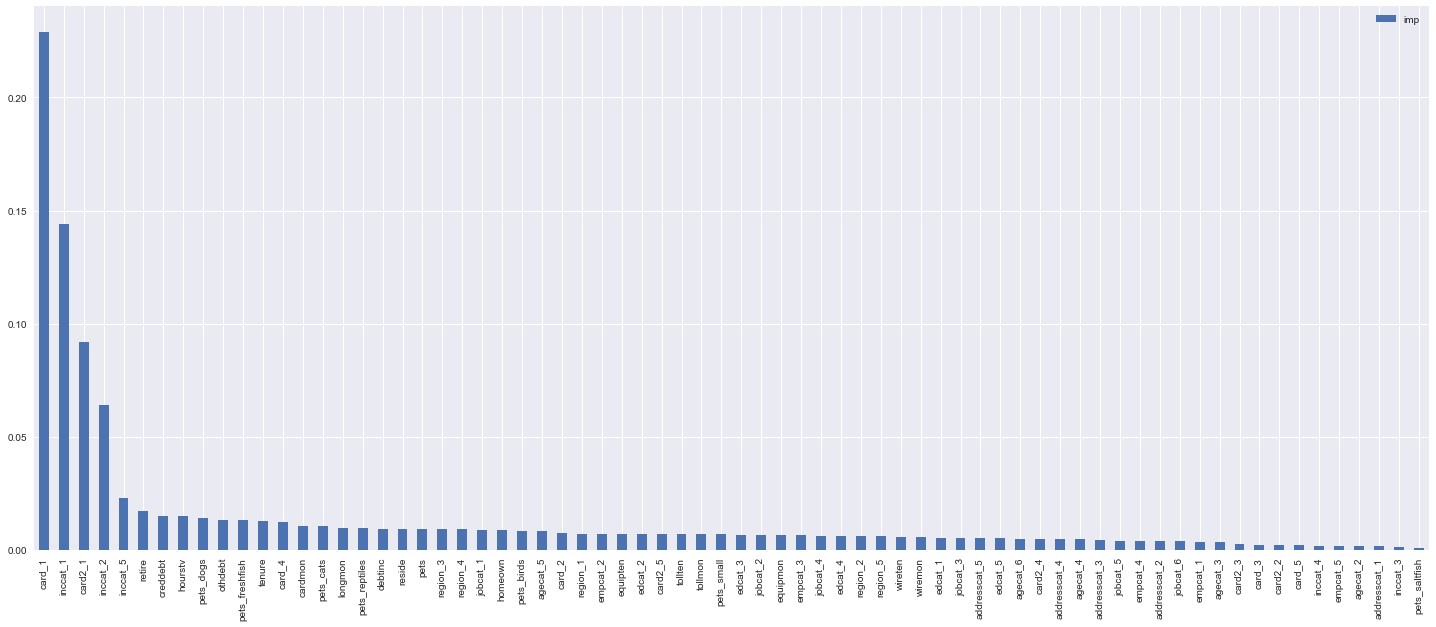

In [65]:
# Plotting features based on decreasing importance value
ext_feat.sort_values(by='imp',ascending=False).plot.bar(figsize=(25,10))

In [66]:
# taking first 25 features 
ext_feat_sort[:25]

,imp
card_1,0.228745
inccat_1,0.143863
card2_1,0.091781
inccat_2,0.064135
inccat_5,0.022779
retire,0.017252
creddebt,0.015156
hourstv,0.014981
pets_dogs,0.014254
othdebt,0.013452


In [67]:
final_pred=ext_feat_sort[:25].index.tolist()
final_pred

[u'card_1',
 u'inccat_1',
 u'card2_1',
 u'inccat_2',
 u'inccat_5',
 u'retire',
 u'creddebt',
 u'hourstv',
 u'pets_dogs',
 u'othdebt',
 u'pets_freshfish',
 u'tenure',
 u'card_4',
 u'cardmon',
 u'pets_cats',
 u'longmon',
 u'pets_reptiles',
 u'debtinc',
 u'reside',
 u'pets',
 u'region_3',
 u'region_4',
 u'jobcat_1',
 u'homeown',
 u'pets_birds']

In [68]:
# Model Buliding
# 1. Splitting data
Xm_train,Xm_test,yl_train,yl_test=train_test_split(x[final_pred].values,spend_target.values,train_size=.75)

In [69]:
# Scaling Data
sc=StandardScaler()
Xl_train_scale=sc.fit_transform(Xm_train)
Xl_test_scale=sc.fit_transform(Xm_test)

# 1. Linear Model

In [72]:
from sklearn.cross_validation import cross_val_score

In [73]:
lin_mod=LinearRegression()
lin_mod.fit(Xl_train_scale,yl_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
mse=cross_val_score(lin_mod,X=Xl_train_scale,y=yl_train,cv=5,scoring='neg_mean_squared_error')
mse

array([-0.32196649, -0.35135691, -0.31109885, -0.28224823, -0.32033928])

In [75]:
rmse_lin_train=np.sqrt(-np.mean(mse))

In [76]:
rmse_lin_train

0.56338437365794414

In [77]:
rmse_lin_test=np.sqrt(-np.mean(cross_val_score(lin_mod,X=Xl_test_scale,y=yl_test,cv=5,scoring='neg_mean_squared_error')))

In [78]:
rmse_lin_test

0.55743557760265638

In [79]:
print "Rmse_train- Linear Model" ,rmse_lin_train,'\n'
print "Rmse_test- Linear Model" ,rmse_lin_test,'\n'

Rmse_train- Linear Model 0.563384373658 

Rmse_test- Linear Model 0.557435577603 



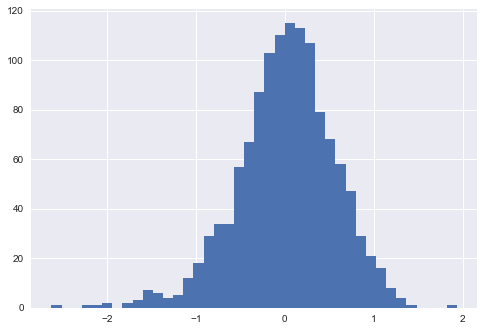

In [80]:
# residuals are normally distributed
pd.Series(yl_test-lin_mod.predict(Xl_test_scale)).hist(bins=40)

In [81]:
# mean and standard deviation:
pd.Series(yl_test-lin_mod.predict(Xl_test_scale)).mean(), pd.Series(yl_test-lin_mod.predict(Xl_test_scale)).std()

(0.014487235107403268, 0.5482825843665404)

In [82]:
from scipy.stats import kstest

In [83]:
# standardizing residuals
sc_res=sc.fit_transform(pd.Series(yl_test-lin_mod.predict(Xl_test_scale)))
pd.Series(sc_res).mean(),pd.Series(sc_res).std()


C:\Users\lenovo\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\lenovo\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


(2.859934511434403e-17, 1.0004002401601124)

In [84]:
# Kolgomoriv Smirnoff test to check fro normality.
kstest(sc_res,'norm')

KstestResult(statistic=0.040946844528928106, pvalue=0.029405012679843079)

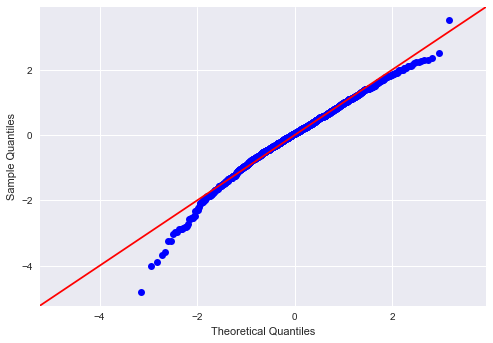

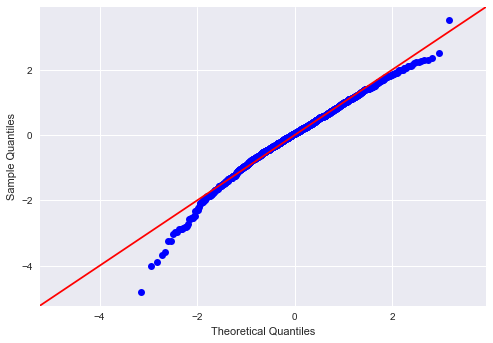

In [86]:
import statsmodels.api as sm
sm.qqplot(sc_res,line='45')

## Since residuals are normally distributed, So assumption of linear Model is satisfied.

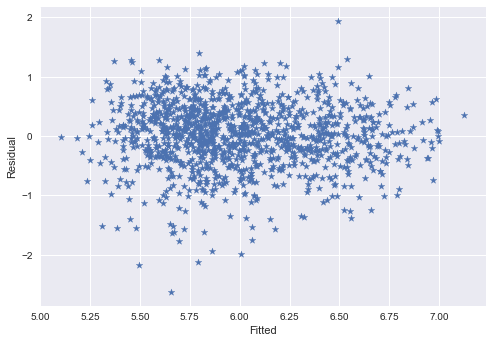

In [87]:
plt.scatter(lin_mod.predict(Xl_test_scale),yl_test-lin_mod.predict(Xl_test_scale),marker='*')
plt.xlabel("Fitted")
plt.ylabel("Residual")

## . Residual Vs fitted plot gives a very good insight.
  - Since there is no pattens in the error terms , so there is no non-linearity in data
  - it has constant variance , homoskedacity

---

# 2.Random Forest


---

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV

C:\Users\lenovo\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [92]:
rm=RandomForestRegressor(random_state=12)

In [93]:
param_grid = { "n_estimators"      : [100,150,200],
               "max_features"      : [5, 10],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4]
           }
grs=GridSearchCV(estimator=rm,param_grid=param_grid,cv=5,verbose=True)


In [94]:
grs.fit(Xl_train_scale,yl_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=12,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200], 'max_features': [5, 10], 'min_samples_split': [2, 4], 'max_depth': [10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [95]:
grs_mse_train=cross_val_score(grs.best_estimator_,X=Xl_train_scale,y=yl_train,cv=5,scoring='neg_mean_squared_error')
grs_mse_test=cross_val_score(grs.best_estimator_,X=Xl_test_scale,y=yl_test,cv=5,scoring='neg_mean_squared_error')


In [96]:
grs_rmse_tr=np.sqrt(-np.mean(grs_mse_train))
grs_rmse_test=np.sqrt(-np.mean(grs_mse_test))

In [97]:
print "Rmse_train- random" ,grs_rmse_tr,'\n'
print "Rmse_test- random" ,grs_rmse_test,'\n'

Rmse_train- random 0.572445680194 

Rmse_test- random 0.574320357772 



# Gradient boosting


In [98]:
from sklearn.ensemble import GradientBoostingRegressor

In [99]:
gb=GradientBoostingRegressor(n_estimators=50,random_state=12)

In [100]:
gb.fit(Xl_train_scale,yl_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=12, subsample=1.0, verbose=0, warm_start=False)

In [101]:
# Cross-Validating 
gb_mse_train=cross_val_score(gb,X=Xl_train_scale,y=yl_train,cv=5,scoring='neg_mean_squared_error')
gb_mse_test=cross_val_score(gb,X=Xl_test_scale,y=yl_test,cv=5,scoring='neg_mean_squared_error')


In [102]:
gb_rmse_tr=np.sqrt(-np.mean(gb_mse_train))
gb_rmse_test=np.sqrt(-np.mean(gb_mse_test))

In [103]:
print "Rmse_train- Gradient Boosting" ,gb_rmse_tr,'\n'
print "Rmse_test- Gradient Boosting" ,gb_rmse_test,'\n'

Rmse_train- Gradient Boosting 0.569168901258 

Rmse_test- Gradient Boosting 0.567120507885 



In [105]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred=gb.predict(Xl_train_scale),y_true=yl_train)

0.41584339518375218

In [106]:
mean_absolute_error(y_pred=gb.predict(Xl_test_scale),y_true=yl_test)

0.42710049308103026

In [109]:
yl_test[3]

5.7938364404966389

In [110]:
print 'Predicted  ',gb.predict(Xl_test_scale[3])  ,'Actual value', yl_test[3]

Predicted   [ 6.02966325] Actual value 5.7938364405


C:\Users\lenovo\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


# All three models have comparative RMSE values.


## Gradient Boosting:

 - Rmse_train- Gradient Boosting 0.569168901258 
 
- Rmse_test- Gradient Boosting 0.567120507885 

## Random Forest:

-  Rmse_train- random 0.572445680194 

- Rmse_test- random 0.574320357772 

## Linear Model:

- Rmse_train- Linear Model 0.563384373658 

- Rmse_test- Linear Model 0.557435577603 

***

## Drivers for the Model:

[u'card_1', u'inccat_1', u'card2_1', u'inccat_2', u'inccat_5', u'retire', u'creddebt', u'pets_dogs', u'hourstv', u'pets_freshfish', u'othdebt', u'tenure', u'card_4', u'cardmon', u'pets_cats', u'reside', u'region_4', u'longmon', u'pets_reptiles', u'debtinc', u'region_3', u'jobcat_1', u'pets', u'homeown', u'pets_birds']

---

<big>

*** We can improve model performance by including more features ***